[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/response_forced_vibration.ipynb)

In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
try:
    from matplolib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install matplotlib")
    from matplotlib import pyplot as plt

## The problem

In this problem we have a spring-mass-damper system with constants $k$, $m$ and $c$ respectively.
The ODE (ordinary differential equation)

$$
m\ddot{x} + c\dot{x} + kx = f
$$

Where are going to consider that $f$ is harmonic, that means

$$
f(t) = f_0 \cdot \cos \omega t = f_0 \exp \left(i\omega t\right)
$$

For this problem, we don't care about the transient period, only when the intransient.
That means that $x(t)$ assumes the expression

$$
x(t) = X(\omega) \cdot \exp \left(i\omega t\right)
$$

Applying on the ODE we get

$$
\dot{x} = i\omega X(\omega) \cdot \exp \left(i\omega t\right)
$$
$$
\ddot{x} = -\omega^2 X(\omega) \cdot \exp \left(i\omega t\right)
$$

Then we have

$$
\left[-m\omega^2+ic\omega+k\right] \cdot X(\omega) \cdot \exp \left(i\omega t\right) = f_0 \exp \left(i\omega t\right)
$$

$$
\boxed{X(\omega) = \dfrac{f_0}{k-m\omega^2 + ic\omega} = \dfrac{f_0}{k} \cdot G(\omega)}
$$

$$
G(\omega) = \dfrac{1}{1-\left(\frac{\omega}{\omega_n}\right)^2 + 2i\xi \left(\frac{\omega}{\omega_n}\right)}
$$

When we plot the curves of $G(\omega)$, the gain $\left|G(\omega)\right|$ and the phase $\arg(G(\omega))$ then we get

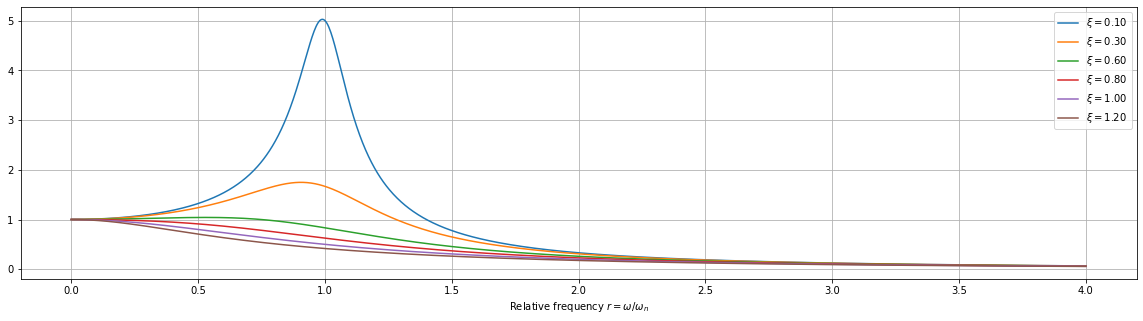

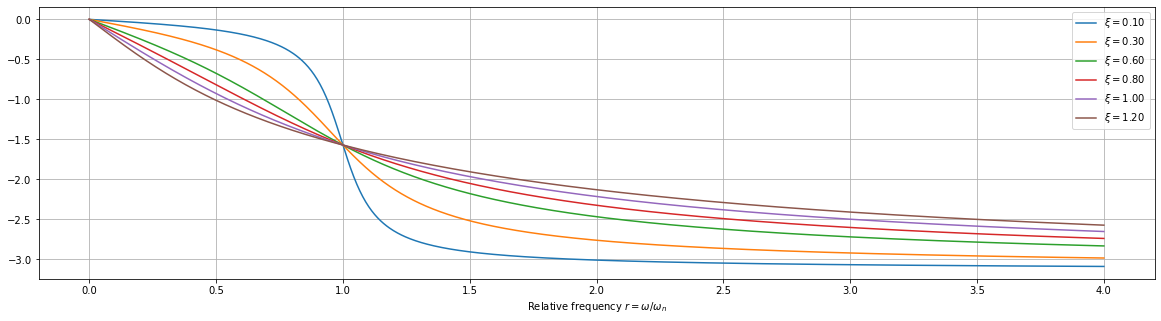

In [2]:
rs = np.linspace(0, 4, 1025)
xivals = [0.1, 0.3, 0.6, 0.8, 1, 1.2]
fig1 = plt.figure(figsize=(20, 5))
axes1 = plt.gca()
fig2 = plt.figure(figsize=(20, 5))
axes2 = plt.gca()
for xi in xivals:
    Gs = 1/(1-rs**2 + 2j*xi*rs)
    gain = np.abs(Gs)
    phase = np.angle(Gs)
    axes1.plot(rs, gain, label=r"$\xi = %.2f$" % xi)
    axes2.plot(rs, phase, label=r"$\xi = %.2f$" % xi)
for axes in [axes1, axes2]:
    axes.set_xlabel("Relative frequency $r = \omega/\omega_{n}$")
    axes.legend()
    axes.grid()

The resonance frequency and the maximum value of the gain is given by

$$
\max_{\omega \in \mathbb{R}^+} |G(\omega)| = |G(\omega_r)| = \dfrac{1}{2\xi \sqrt{1-\xi^2}}
$$

$$
\omega_{r} = \omega_{n} \cdot \sqrt{1-2\xi^2}
$$

As we are interested in the curves $F(t)$ and $\ddot{x}(t)$ then as an example we will have the following image

In [ ]:
xi = 0.2
wn = 1
wvals = [0.6, 0.8, np.sqrt(1-2*xi**2), 1.2, 1.5]
t = np.linspace(0, 60, 1025)
for w in wvals:
    plt.figure(figsize=(20, 5))
    r = w/wn
    G = 1/(1-r**2+2j*xi*r)
    F = np.cos(w*t)
    ddx = np.real(-w**2*G) * np.cos(w*t)
    plt.plot(t, ddx, color="r", label="Acceleration")
    plt.plot(t, F, color="b", label="Force")
    plt.title(r"Results when $\omega/\omega_n = %.2f$" % r)
    plt.xlabel(r"Time $t$")
    plt.legend()


And if we plot both curves in the same graph we get some elipses

In [ ]:
xi = 0.2
wn = 1
wvals = [0.1, 0.6, 0.8, np.sqrt(1-2*xi**2), 1.2, 1.5, 1e+9]
plt.figure(figsize=(10, 10))
for w in wvals:
    r = w/wn
    G = 1/(1-r**2+2j*xi*r)
    F = np.cos(w*t)
    ddx = np.real(-w**2*G) * np.cos(w*t)
    plt.plot(ddx, F, label=r"$r=%.2f$" %r)
    plt.title(r"Results when $\omega/\omega_n = %.2f$" % r)
    plt.xlabel(r"Time $t$")
    plt.legend()

## Online Available

This python notebook is available in GitHub at the link:

* [GitHub/carlos-adir/UnB-Courses/vibracoes/response_forced_vibration](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/response_forced_vibration.ipynb)